In [51]:
# https://github.com/timesler/facenet-pytorch

!pip install facenet-pytorch

In [63]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

In [53]:
workers = 0 if os.name == 'nt' else 4
workers

4

In [54]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

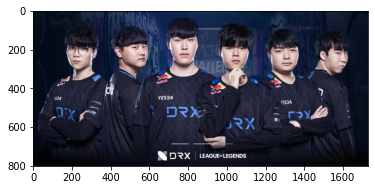

In [90]:
img = cv2.imread('test_3.jpg')

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img)
plt.show()

In [91]:
mtcnn = MTCNN(keep_all=True, device=device)

In [92]:
start = time.time()
faces, probs = mtcnn(img, return_prob=True)
end = time.time()

print(len(faces))

print(end-start)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


6
1.1367347240447998


0.99999976
torch.Size([160, 160, 3])


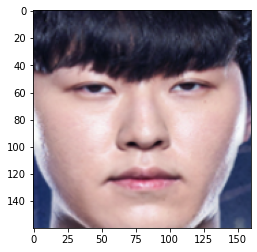

0.99999976
torch.Size([160, 160, 3])


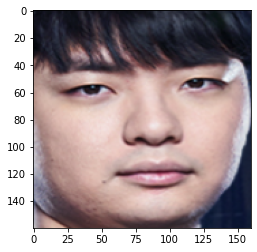

0.9999453
torch.Size([160, 160, 3])


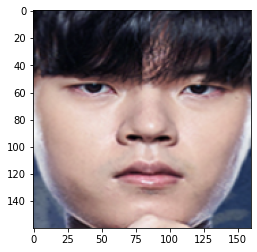

0.999605
torch.Size([160, 160, 3])


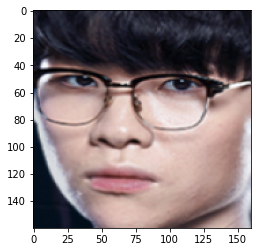

0.99997234
torch.Size([160, 160, 3])


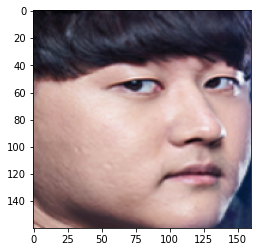

0.99999285
torch.Size([160, 160, 3])


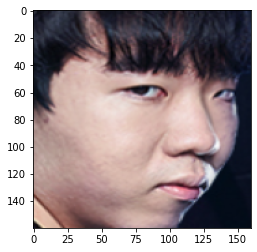

In [93]:
faces = np.transpose(faces, (0, 2, 3, 1))
faces = (faces + 1.0) / 2.0

for i in range(len(faces)):
    print(probs[i])
    print(faces[i, :, :, :].shape)
    plt.imshow(faces[i, :, :, :])
    plt.show()

In [94]:
start = time.time()
boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
end = time.time()

print(end-start)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


1.0038917064666748


(4,)
[710.9312   93.85326 852.7561  268.82788]
(5, 2)
[[750.01935 153.48381]
 [815.4982  151.75116]
 [782.8994  194.63713]
 [757.66943 228.25873]
 [807.95374 228.45892]]
0.99999976
0.99999976
0.9999453
0.999605
0.99997234
0.99999285


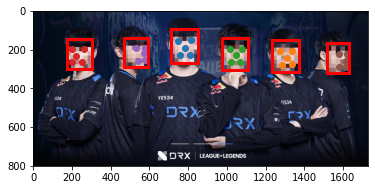

In [95]:
print(boxes[0].shape)
print(boxes[0])

print(landmarks[0].shape)
print(landmarks[0])

fig, ax = plt.subplots()

for box, prob, landmark in zip(boxes, probs, landmarks):

    print(prob)
    
    x1 = box[0].astype(int)
    y1 = box[1].astype(int)
    x2 = box[2].astype(int)
    y2 = box[3].astype(int)
    reduced = cv2.resize(img[y1:y2, x1:x2], ((x2-x1)//20, (y2-y1)//20), interpolation=cv2.INTER_LINEAR)
    pixelated = cv2.resize(reduced, (x2-x1, y2-y1), interpolation=cv2.INTER_NEAREST)
    img[y1:y2, x1:x2] = pixelated
    ax.imshow(img)
    
    bbox = mpl.patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(bbox)
    
    ax.scatter(landmark[:, 0], landmark[:, 1])

fig.show()